# Wasserstein Eigenvectors on the 2-D torus

This notebook showcases the Wasserstein eigenvectors for synthetic datasets of translated histograms on the 2-D torus.

## Imports

In [1]:
!pip install pot
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ot
import pandas as pd

     |████████████████████████████████| 430kB 8.5MB/s 


## Functions to compute distances

In [2]:
# Compute OT distance matrix, with TV regularization
def distance_matrix(A, C, tau=0):
    D = np.zeros((A.shape[1], A.shape[1]))
    for i in range(A.shape[1]):
        D[i, :i] = D[:i, i] = ot.emd2(np.ascontiguousarray(A[:,i]), A[:,:i], C) + tau*C.max()*abs(A[:,[i]] - A[:,:i]).sum(0)
    return D

In [3]:
# Distance of two bins on the 1-D torus
def torus_distance(i, j, n):
    d1 = abs(j - i)
    d2 = n - d1
    return min(d1, d2)

In [4]:
# Generate random distance-like matrix
def random_distance(n, seed=None):
    np.random.seed(seed)
    D = np.random.rand(n, n)
    D += D.T
    np.fill_diagonal(D, 0)
    return D/D.max()

In [5]:
# Hilbert metric between two matrices
def hilbert(D1, D2):
    idx = (np.eye(D1.shape[0]) != 1) # exclude diagonal
    div = np.log(D1[idx]/D2[idx])
    return div.max() - div.min()

In [6]:
# Power iterations
def power_it(A, D_ref, n_iter=10, compute_loss=True, tau=0):
    D, loss = random_distance(A.shape[0], seed=42), []
    for _ in range(n_iter):
        print(_, end=' ')
        if compute_loss:
            loss.append(hilbert(D, D_ref))
        D = distance_matrix(A, D, tau=tau)
        D /= D.max()
    print('')
    return D, loss

## Example 1: Translated Gaussian

In [ ]:
n =  15

In [ ]:
sigma =  1.4
A_gauss_2D = np.zeros((n*n, n*n))
for k in range(n*n):
    plane = np.zeros((n, n))
    oi, oj = k//n, k%n
    for i in range(n):
        for j in range(n):
            d1 = torus_distance(i, oi, n)
            d2 = torus_distance(j, oj, n)
            d = np.sqrt(d1**2 + d2**2)
            plane[i, j] = np.exp(-d/sigma**2)
    A_gauss_2D[:,k] = plane.reshape(-1)
A_gauss_2D /= A_gauss_2D.sum(0)

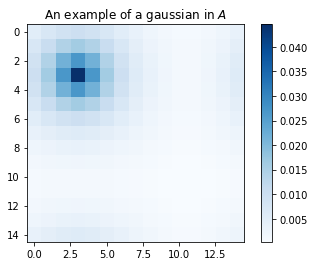

In [ ]:
# Plot template
plt.title('An example of a gaussian in $A$')
plt.imshow(A_gauss_2D[:,48].reshape((n, n)), cmap='Blues')
plt.colorbar();

In [ ]:
# Compute eigenvector
D_gauss_2D, _ = power_it(A_gauss_2D, None, n_iter=50, compute_loss=False)

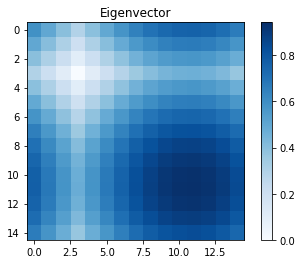

In [ ]:
# Plot eigenvector
plt.title('Eigenvector')
plt.imshow(D_gauss_2D[:,48].reshape((n, n)), cmap='Blues')
plt.colorbar();

## Example 2: Translated Gaussian Mixture

In [ ]:
n = 15

In [ ]:
sigma =  1
A_mix_2D = np.zeros((n*n, n*n))
for k in range(n*n):
    plane = np.zeros((n, n))
    oi, oj = k//n, k%n
    for i in range(n):
        for j in range(n):
            d1 = torus_distance(i, oi, n)
            d2 = torus_distance(j, oj, n)
            d = np.sqrt(d1**2 + d2**2)
            plane[i, j] += np.exp(-d/sigma**2)
            plane[(i + 8)%n, (j + 8)%n] += .8*np.exp(-d/sigma**2)
    A_mix_2D[:,k] = plane.reshape(-1)
A_mix_2D /= A_mix_2D.sum(0)

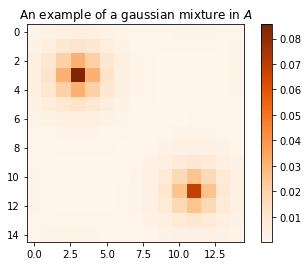

In [ ]:
plt.title('An example of a gaussian mixture in $A$')
plt.imshow(A_mix_2D[:,48].reshape((n, n)), cmap='Oranges');
plt.colorbar();

In [ ]:
# Compute eigenvector
D_mix_2D, _ = power_it(A_mix_2D, None, n_iter=50, compute_loss=False)

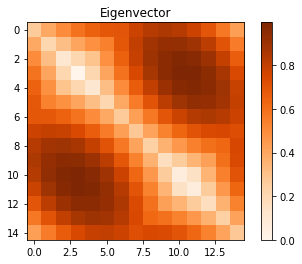

In [ ]:
# Plot eigenvector
plt.title('Eigenvector')
plt.imshow(D_mix_2D[:,48].reshape((n, n)), cmap='Oranges')
plt.colorbar();

## Example 3: Diracs

In [7]:
n = 15

In [8]:
A_diracs_2D = np.zeros((n*n, n*n))
for k in range(n*n):
    plane = np.zeros((n, n))
    oi, oj = k//n, k%n
    plane[(oi-2)%n, (oj-2)%n] = 1
    plane[(oi-2)%n, (oj+2)%n] = 1
    plane[(oi+2)%n, (oj-2)%n] = 1
    plane[(oi+2)%n, (oj+2)%n] = 1
    A_diracs_2D[:,k] = plane.reshape(-1)
A_diracs_2D /= A_diracs_2D.sum(0)

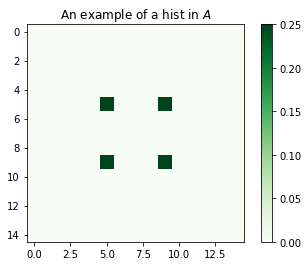

In [9]:
plt.title('An example of a hist in $A$')
plt.imshow(A_diracs_2D[:,n*n//2].reshape((n, n)), cmap='Greens')
plt.colorbar();

In [ ]:
# Compute eigenvector
D_diracs_2D, _ = power_it(A_diracs_2D, None, n_iter=50, compute_loss=False)

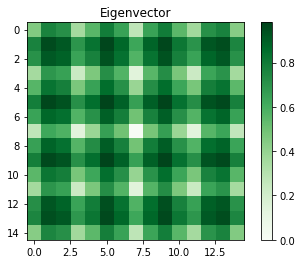

In [11]:
# Plot eigenvector
plt.title('Eigenvector')
plt.imshow(D_diracs_2D[:,n*n//2].reshape((n, n)), cmap='Greens')
plt.colorbar();